# Homework 1: Confidence Intervals and Bootstrapping
***

**Name**: HARISH NANDHAN SHANMUGAM

***

This assignment is due on Gradescope by **Friday January 31 at 5:00PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**:

- There are 4 total questions on this assignment.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected.
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.



---

### Problem 1 (20 Points) Net Promoter Scores

Have you ever seen a survey like this?

![NPS](https://github.com/alexyarosh/stat5000-f23/blob/69a5633a9a37bcc06105e9c18115a6486a45f142/NPS_survey.png?raw=true)


One of the most widely used customer satisfaction metrics is [NPS - Net Promoter Score](https://en.wikipedia.org/wiki/Net_promoter_score). It is  extremely popular, especially among the executives  -- Wikipedia claims that "versions of the NPS are now used by two-thirds of Fortune 1000 companies". But statisically, it is problematic, and it has to be used with care, as you will hopefully see from this problem!

Here's how the NPS is computed from a survey like the one above:
* We call a specific response a **"promoter"** if the rating given is 9 or 10
* We call a response a **"detractor"** if the rating given is 6 or below
* We call a response neutral if the rating is 7 or 8

$$NPS = \frac{\text{number of promoters}-\text{number of detractors}}{\text{total number of responses}} * 100$$

So for example if the sample of responses to the survey is
```
10, 9, 5, 6, 7, 9, 9, 7, 2, 8
```
then we have 4 promoters (scores `10,9,9,9`) and 3 detractors (scores `5,6,2`), and  3 neutral responses, therefore

$$ NPS = \frac{4 - 3}{10}*100 = 10 $$

Notice that NPS can range from -100 (all responses are detractors) to 100 (all responses are promoters). Positive NPS generally signifies positive sentiment, and one of the company's objectives can be to maximize it.

NPS is supposed to measure the general customer sentiment and loyalty towards the product, but only a small subset of people usually fill the survey, so we can use **inference techniques** to estimate what the general sentiment is based on the NPS from the sample.

---
**PART 1.A**
Let's say we have a sample of 10 responses to the NPS survey
`10, 9, 5, 6, 7, 9, 9, 7, 2, 8` and we receive another response.

**What is the resulting NPS from the 11 responses if the 11th response is**:

a. A promoter

b. A detractor

c. Neutral

$$\text{No. of Promoters} = 4$$
$$\text{No. of Detractors} = 3$$
$$\text{No. of Neutral} = 3$$
$$\text{Total} = 10$$

(a) A Promoter:

$$\text{Promoters} = 4 + 1 = 5$$
$$\text{Detractors} = 3$$
$$\text{Neutral} = 3$$
$$\text{Total} = 11$$

$$NPS = \frac{5 - 3}{11} \times 100 = \frac{2}{11} \times 100 \approx 18.18$$

(b) A Detractor:

$$NPS = \frac{4 - 4}{11} \times 100 = 0$$

(c) A Neutral:

$$NPS = \frac{4 - 3}{11} \times 100 = \frac{1}{11} \times 100 \approx 9.09$$


---

**PART 1.B**

Let's say we have a survey with $n$ responses, and let $R_i$, $i=1, \dots, n$ be a discrete random variable that takes value 1 if the response $i$ is a promoter, value 0 if the response is neutral, and -1 if $R_i$ is a detractor.

In other words, $R_i$, $i=1,\dots, n$ is a random sample of $n$ responses.

If the probability of i’th response being a promoter is $p_P$, the probability of it being a detractor is $p_D$, what is the expected value $E[R_i]$ and variance  $Var[R_i]$ of $R_i$?

EXPECTED VALUE
$$E[X] = \sum p(x_i) \cdot x_i$$

$$E[R_i] = \sum_x x \cdot P(R_i = x)$$


$$E[R_i] = 1 \cdot p_P + 0 \cdot (1 - p_P - p_D) + (-1) \cdot p_D$$

$$E[R_i] = p_P - p_D$$

VARIANCE

$$\text{Var}(X) = E[X^2] - (E[X])^2$$

$$\text{Var}(R_i) = E[R_i^2] - (E[R_i])^2$$

$$E[R_i^2] = \sum_x x^2 \cdot P(R_i = x)$$

$$E[R_i^2] = 1^2 \cdot p_P + 0^2 \cdot (1 - p_P - p_D) + (-1)^2 \cdot p_D$$

$$E[R_i^2] = p_P + p_D$$

Already Known,
$$E[R_i] = p_P - p_D$$


$$\text{Var}(R_i) = p_P + p_D - (p_P - p_D)^2$$

$$= p_P + p_D - [p_P^2 + p_D^2 - 2p_Pp_D]$$

$$= p_P + p_D - p_P^2 - p_D^2 + 2p_Pp_D$$

$$\text{Var}(R_i) = p_P(1 - p_P) + p_D(1 - p_D) + 2p_Pp_D$$

---
**PART 1.C**
For the remainder of the problem, let's ignore multiplication by $100$ in the NPS computation. It's just rescaling, and doesn't really affect conclusion, but it complicates the computations.

Explain why $NPS = \bar{R}$, where $\bar{R} = \frac{R_1 + \dots R_n}{n}$, the sample mean of $R_1, \dots, R_n$

$$\text{WKT} \quad NPS = \frac{\text{No. of Promoters} - \text{No. of Detractors}}{n}$$

Mean:

$$\bar{R} = R_i + R_{i1} + R_n$$

Here,  
$$R_i = 1 \quad (\text{Promoters})$$  
$$R_i = -1 \quad (\text{Detractors})$$  
$$R_i = 0 \quad (\text{Neutrals})$$

$$\bar{R} = \frac{1}{n} \sum_{i=1}^{n} 1(R_i = 1) + \frac{1}{n} \sum_{i=1}^{n} (-1)(R_i = -1) + \frac{1}{n} \sum_{i=1}^{n} 0(R_i = 0)$$
$$\bar{R} = \frac{1}{n} \sum_{i=1}^{n} 1(R_i = 1) - \frac{1}{n} \sum_{i=1}^{n} 1(R_i = -1)$$
$$\bar{R} = \frac{\text{No. of Promoters} - \text{No. of Detractors}}{n}$$

Hence, $$ NPS = \bar{R} $$

---
**PART 1.D**

Considering that $NPS$ can be seen as a sample mean, what is the approximate distribution of $NPS$ for large sample sizes $n$? Make sure to state the mean and variance of that distribution.


_Hint 1. There is a *very important*, one could even say "central", theorem..._

_Hint 2. Refer to STAT 5000 to remind yourself what is the mean and variance of a sample mean from an iid sample with population mean $\mu$ and variance $\sigma^2$_



As per the Central Limit Theorem,  
$$N(\mu, \frac{\sigma^2}{n})$$  

where  
$$\mu = \text{mean}$$  
$$\sigma^2 = \text{variance}$$  

Here, in this NPS,  

$$\text{mean} = p_P - p_D$$  

$$\text{variance} = p_P(1 - p_P) + p_D(1 - p_d) + 2 p_P p_D$$  

Thus,  

$$NPS \sim N \left( p_P - p_D, \frac{p_P(1 - p_P) + p_D(1 - p_D) + 2 p_P p_D}{n} \right)$$


---
**PART 1.E**

Write down the 95% $z$ confidence interval for $NPS$.

_Note 1: Problem 1.4 is what tells us that we can use the $z$ confidence interval in the first place! Remember that "$z$" refers to!_

_Note 2: Feel free to just use 1.96 as the critical value_

Significance Value,
$$\alpha = 1 - 0.95 = 0.05$$

$$Z_{\alpha/2} = Z_{0.05/2} = 1.96$$

$$\bar{R} = \text{Mean} = \text{Expected Value} = p_P - p_D$$

$$\bar{R} - 1.96 \times (\frac{\sigma}{\sqrt{n}}), \quad \bar{R} + 1.96 \times (\frac{\sigma}{\sqrt{n}})$$

$$p_P - p_D - 1.96* \sqrt(\frac{p_P(1-p_P) + p_D(1-p_D) + 2*p_P*p_D}{n})) , p_P - p_D + 1.96* \sqrt(\frac{p_P(1-p_P) + p_D(1-p_D) + 2*p_P*p_D}{n})$$


---
**PART 1.F**

Let's say that on a survey with 30 responses,  the propotion of promoters was 0.5, and proportion of detractors was 0.3.

Then the $NPS$ (without multiplying by 100) is $0.5 - 0.3 = 0.2$.
What is the 95\% confidence interval for this score?

- NPS = 0.2
- p_P = 0.5
- p_D = 0.3

$$ (0.5 - 0.3 - 1.96* \sqrt(\frac{(0.5(1-0.5) + 0.3(1-0.3) + 2*0.5*0.3)}{30})) , (0.5 - 0.3 + 1.96* \sqrt(\frac{(0.5(1-0.5) + 0.3(1-0.3) + 2*0.5*0.3)}{30}))$$
$$ (0.2 - 1.96* 0.1592) , (0.2 + 1.96* 0.1592)$$
$$ (0.2 - 0.31) , (0.2 + 0.31)$$
$$ [-0.11,0.51] $$


In [ ]:
p_P = 0.5
p_D = 0.3
n = 30
z = 1.96

std_err = sqrt((p_P * (1 - p_P) + p_D * (1 - p_D) + 2 * p_P * p_D) / n)

lower_CI = 0.2 - z * std_err
upper_CI = 0.2 + z * std_err


lower_CI
upper_CI

[1] -0.1119624

[1] 0.5119624

---

NPS is widely used in customer analytics, but it doesn't have built-in procedures in R like `t.test` for mean or `prop.test` for proportion, and you might not want to go through the computation above every time you want to report NPS together with the margin of error or its CI. So creating a bootstrap confidence interval can be a good alternative.

---

### Problem 2 (25 Points): Bootstrapping Net Promoter Scores

(For the definition of NPS, see Problem 1)

The code below reads an example dataset of NPS survey responses into the dataframe `data`. The responses are in the `response` column.


In [3]:
data <- read.csv('/content/nps.csv')
head(data)

,response
,<int>
1,10
2,5
3,8
4,9
5,8
6,10


---
**PART 2.A**

Create a function called `nps()` that takes a vector of survey responses as an argument and returns the NPS based on those responses. Demonstrate the function by calling it on the `response` column of `data`.

In [8]:
nps = function(response){
  promoters = sum(response >= 9)
  detractors = sum(response <= 6)
  Nps = (promoters - detractors)/length(response) * 100
  return (Nps)
}

nps_val = nps(data$response)
nps_val


[1] 8.318264

**PART 2.B**
Create one bootstrap sample from the `response` column of `data`, and compute the NPS for that boostrap sample.

In [9]:
bootstrap_samples = sample(data$response,size=length(data$response),replace=TRUE)
nps_bootstrap = nps(bootstrap_samples)
nps_bootstrap

[1] 9.2827


---

*If you created the bootstrap sample correctly, the NPS should be different from the NPS you computed from `data$responses`.*

---


**PART 2.C**

1. Create 30 bootstrap samples of the `response` column of `data`. Save them in a variable.
2. Compute NPS for each sample
3. Plot the distribution of bootstrapped NPS by plotting a normalized histogram of these scores


*Hint: The function `replicate()` might be helpful*

*Note: If you're using `ggplot`, you can normalize a histogram by specifying `y = after_stat(density)` inside `aes` in `geom_histogram()`*

_Notice that 30 is the number of bootstrap samples, not the size of them! The size of any bootstrap sample sample is just the size of the dataset, because the dataset is the sample._


NPS
<dbl>
8.800482
5.967450
3.435805
7.112719
9.885473
8.860759
5.605787
8.800482
6.027728


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


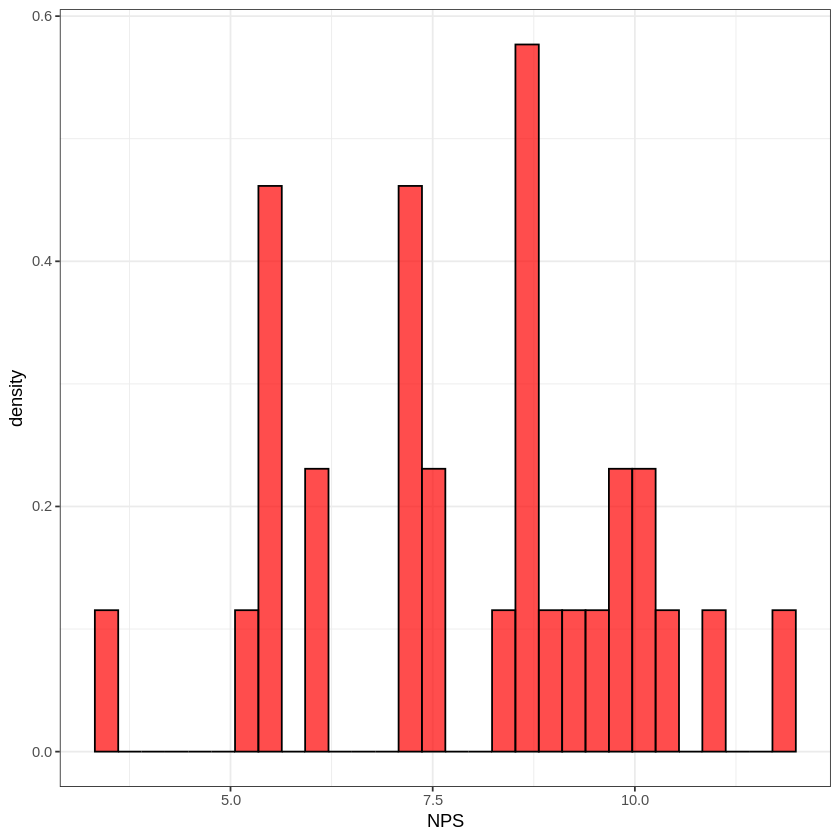

In [11]:
library(ggplot2)
bootstrap_samples = replicate(30, sample(data$response, length(data$response), replace=TRUE))

bootstrap_nps = numeric(ncol(bootstrap_samples))

for(i in 1:ncol(bootstrap_samples)){
  sample_data = bootstrap_samples[,i]
  bootstrap_nps[i] = nps(sample_data)
}

bootstrap_nps_df = data.frame(NPS = bootstrap_nps)
bootstrap_nps_df
ggplot(data = bootstrap_nps_df) +
  geom_histogram(aes(x = NPS, y = after_stat(density)),
                 alpha = 0.7, color = "black", fill = "red") +
  theme_bw()

---

_It's very difficult to understand the distribution of scores from this histogram. For example, what is the variance of this distribution? How likely are the numbers around 8.31 (the NPS for the original data) to appear?.. To answer questions like this, we need to take more bootstrap samples to get a "smoother" distribution._

---


**PART 2.D**

1. Repeat the process in the previous question, but generate 3000 samples this time. Save the 3000 NPS results in a variable -- you'll use them in the next question.
2. Plot the normalized histogram of the 3000 samples, and a density plot in a different color.
3. Also, add a vertical line at the NPS value for the original dataset (in a third color)

The distribution should look much smoother now. What can you say about the shape of the bootstrap distribution, and the role of the NPS of the original dataset in it?

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


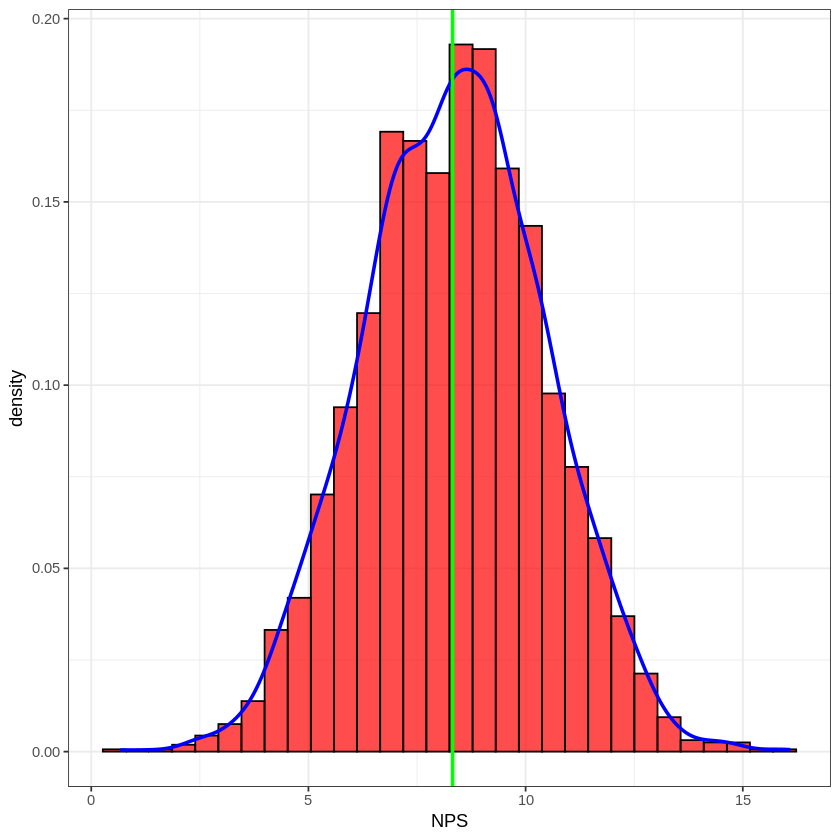

In [12]:
bootstrap_samples = replicate(3000, sample(data$response, length(data$response), replace=TRUE))
bootstrap_nps = numeric(ncol(bootstrap_samples))

for(i in 1:ncol(bootstrap_samples)){
  sample_data = bootstrap_samples[,i]
  bootstrap_nps[i] = nps(sample_data)
}
bootstrap_nps_df = data.frame(NPS = bootstrap_nps)
nps_data = nps(data$response)

ggplot(data = bootstrap_nps_df, aes(x=NPS))+
geom_histogram(aes(y =  after_stat(density)),alpha=0.7,color="black",fill="Red")+
geom_density(color = "blue", size = 1)+
geom_vline(aes(xintercept = nps_data), color = "green", size = 1) +
theme_bw()

---

When reporting business metrics (like NPS scores) that are based on samples, it's a good idea to also specify the margin of error or the the confidence interval, so that the audience of the report understands how to interpret the metric. For example, it can look something like $20.3 \pm 3.56$, or $(52.4, 61.3)$

Given the bootstrap distribution that you just obtained, we'll compute the 95\% confidence interval for the NPS of the original dataset.

There are multiple methods of obtaining CIs from bootstrap samples. We'll use a method called **percentile bootstrap**: to determine the 95\% CI, we'll find such values that 95\% of the bootstrap distribution lies within those values:

![bootstrap distribution](https://github.com/alexyarosh/stat5000-f23/blob/main/bootstrap_ci.png?raw=true)

For this symmeric distribution, this means we need to find one value such that 2.5\% (half of 5\%) of the bootstrap distribution is to the left of it, and another value such that 2.5\% of the distribution is to the right.


---

**PART 2.E**

Use the built in `quantile()` function to find the lower and upper limits of the 95\% confidence interval for the bootstrap distribution that you created in 2.4.

In [13]:
lower_CI = quantile(bootstrap_nps_df$NPS,0.025)
upper_CI = quantile(bootstrap_nps_df$NPS,0.975)

lower_CI
upper_CI

2.5% 
4.400241

97.5% 
12.35684

---
**PART 2.F**

Compute the differences between the original sample NPS and the lower/upper limits for the confidence interval.

Are they equal? Should we expect them to be? Why or why not?

Hint: is the distribution *perfectly, completely symmetric*?

In [14]:
lower_limit_difference = nps_data - lower_CI
upper_limit_difference = upper_CI - nps_data
cat("Difference")
lower_limit_difference
upper_limit_difference

Difference

2.5% 
3.918023

97.5% 
4.038577

- No they are not equal
- We should not expect them to be equal because the bootstrap distribution is not always perfectly completely symmetric because there'll be variability in samples, due to data skewness
- Small sample sizes and the outliers in the data may lead to create the asymmetry and if the distribution is not symmetric then the original sample NPS and LowerCI and Upper CI differences won't be equal

### Problem 3 (25 Points): How old are cats in animal shelters?

Austin city government regularly [publishes data](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) about animals in the city-run animal shelter. The code below loads information about a _sample_ of cats from that shelter into the variable `cats`:

In [ ]:
cats <- read.csv('/content/cats.csv')
head(cats)

,X,animal_id,name,outcome_type,animal_type,breed,color,age_days
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,A846341,,Adoption,Cat,Domestic Shorthair,Blue Tabby,55
2,2,A772759,*Bella,Adoption,Cat,Domestic Medium Hair Mix,Blue,63
3,3,A666893,Pristy,Transfer,Cat,Domestic Shorthair Mix,Black,2237
4,4,A753626,*Mooney,Adoption,Cat,Domestic Shorthair Mix,Black,92
5,5,A747591,,Transfer,Cat,Domestic Longhair Mix,Brown Tabby,369
6,6,A703272,*Catelyn,Adoption,Cat,Domestic Shorthair Mix,Cream Tabby/White,88


This data contains information about each cat, like their name, age and breed, as well as the outcome for them (e.g. "Adoption").

In this problem, we'll be working with `age_days` column, which contains the estimated age of the cat (at the moment of the outcome, so e.g. at the moment of adoption).

This granularity - days instead of for example years - is important, as we'll see shortly.

**PART 3.A**

Do you think most of the cats in the shelter are kittens? Adults? Seniors? Everyone in equal measure?

_You don't need to analyze data, and there's no incorrect answer to this question. Just write what your intuition tells you!_

I think most of the cats in the shelter are kittens(younger ones).

**PART 3.B**

Plot the histogram of the ages of the cats in this sample (the `age_days` column).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


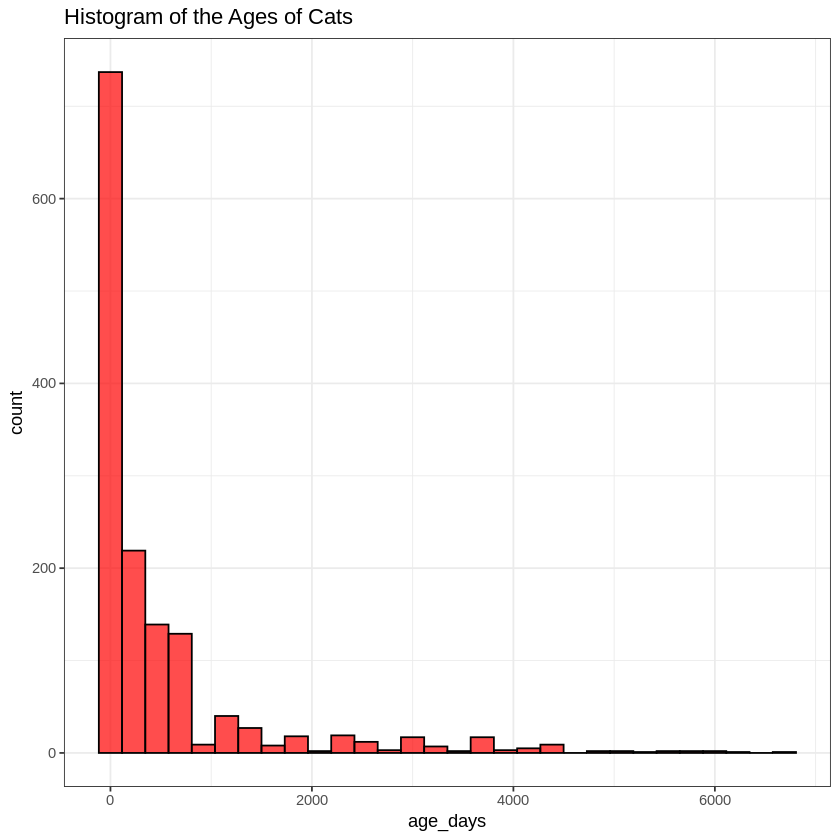

In [ ]:
library(ggplot2)
ggplot(cats)+
geom_histogram(aes(x=age_days), alpha = 0.7,color="black",fill="red")+
labs(title = "Histogram of the Ages of Cats")+
theme_bw()

**PART 3.C**

Compute the mean and the median of cat ages in the `cats` sample.

In [ ]:
mean_cat_ages = mean(cats$age_days, na.rm = TRUE)
median_cat_ages = median(cats$age_days, na.rm = TRUE)

mean_cat_ages
median_cat_ages

[1] 518.7756

[1] 110

---
**PART 3.D**

Considering the shape of the distribution that you plotted in 3.2, which of the two measures - mean or median - is a more meaningful measure of "centrality" for this data? Why?

- Here from the shape of the distribution, the histogram is right skewed.
- Usually mean will be affected if more number of outliers are present in the dataset.
- Median is the great measure of 'centrality' for this data because median won't be affected by the outliers in data.

---
**PART 3.E**

1. Generate 1000 bootstrap samples of cat ages, and compute the median for each sample
2. Plot the histogram and density plot (in different colors) of the distribution of the 1000 bootstrapped medians
3. Add a vertical line (in a different color) at the value of the sample median of `cats$age_days`

[1] 105 112 111 105 108 110 110 107 115 105 106 107 111 113 110 106 110 102
  [19] 121 108 108 106 107 116 110 110 121 125 107 110 108 107 121 108 108 120
  [37] 102 107 110 108 116 113 121 116 104 106 111 107 102 120 106 111 113 111
  [55] 105 104 105 102 108 110 108 108 107 107 124 103 103 114 123 111 112 104
  [73] 111 108 109 108 115 108 113 110 110 121 100 105 110 108 104 114 108 120
  [91] 121 106 111 109 109 108 105 120 111 110 107 115 105 106 110 116 112 105
 [109] 104 105 111 114 107 121 118 121 111 108 107 106 108 112 114 111 112 104
 [127] 107 104 107 107 110 105 106 124 111 104 114 107 110 107 105 111 111 116
 [145] 108 111 121 110 118 112 115 113 109 111 116 109 114 106 113 108 116 104
 [163] 120 109 109 115 102 110 103 104 106 107 110 103 129 109 112 103 105 105
 [181] 105 104 104 108 110 105 105 104 102 107 115 108 108 113 110 110 106 104
 [199] 103 109 106 123 109 109 106 105 109 108 107 108 107 123 105 108 110 107
 [217] 105 105 106 107 113 104 110 101 108 108 121 111 109 114 111 123 107 100
 [235] 108 110 108 111 105 109 107 111 107 106 108 115 111 108 103 107 109 108
 [253] 106 108 111 111 105 110 111 111 109 114 123 113 106 124 107 104 102 108
 [271] 110 108 102 114 124 108 121 108 105 113 123 114 117 111 105 123 109  99
 [289] 106 107 108 115 110 106 105 110 112 105 105 108 110 124 108 111 106 109
 [307] 112 117 108 115 111 109 102 107 106 105 105 105 105 105 110 114 108 107
 [325] 110 110 113 103 105 121 107 104 126 114 115 112 105 127 108 105 109 111
 [343] 105 113 109 108 114 125 114 112 114 107 109 107 110 105 107 109 101 104
 [361] 104 108 110 107 109 110 111 104 109 108 110 110 101 109 111 107 102 105
 [379] 104 103 123 108 107 107 111 112 108 114 106 105 107 123 110 106 109 112
 [397] 117 116 109 108 114 107 110 114 114 113 113 108 108 110 111 110 109 109
 [415] 113 117 110 108 113 114 123 109 108 108 108 107 108 108 109 108 108 113
 [433] 109 108 108 118 110 108 105 117 110 104 108 113 107 110 117 105 108 110
 [451] 124 107 124 107 113 111 109 102 109 112 121 108 113 109 111 108 114 116
 [469] 103 107 107 105 107 108 107 107 109 107 110 114 125  99 104 109 113 110
 [487] 110 109 123 104 113 105 109 112 101 108 125 116 111 108 114 112 111 106
 [505] 113 124 104 116 109 126 102 111 111 105 101 114 124 123 110 112 113 100
 [523] 109 105 105 108 105 106 111 114 113 107 108 123 112 106 108 112 118 107
 [541] 108 112 113 109 106 102 109 107 112 116 104 107 111 125 109 109 111 107
 [559] 116 105 107 110 113 109 110 106 106 106 100 110 104 114 111 111 127 107
 [577] 111 118 106 107 106 110 112 114 102 107 127 111 106 108 108 116 109 111
 [595] 106 114 106 114 114 111 108 110 105 107 110 105 106 108 107 111 110 126
 [613] 102 104 108 118 111 108 110 121 112 107 126 107 105 113 124 109 107 108
 [631] 123 105 114 107 109 105 116 115 111 111 104 111 105 111 100 109 110 116
 [649] 112 105 114 110 104 108 115 123 112 115 120 105 124 111 106 105 105 108
 [667] 106 107 118 115 109 108 107 125 113 111 109 108 110 117 108 115 109 113
 [685] 105 110 108 105 123 110 113 114 111 116 108 112 111 113 123 115 121 112
 [703] 102 106 108 109 121 110 120 105 108 108 114 108 110 113 121 114 111 108
 [721] 115 111 108 106 113 115 110 110 112 105 104 120 107 106 115 111 116 115
 [739] 110 121 120 110 106 109 108 111 105 109 112 110 108 108 108 121 114 107
 [757] 110 113 107 113 106 121 104 114 106 107 111 116 108 110 108 104 111 108
 [775] 107 129 110 118 108 111 107 103 110 124 111 107 111 105 111 110 109 106
 [793] 121 113 110 108 121 111 107 111 106 110 105 104 109 105 123 108 116 114
 [811] 107 105 107 105 113 104 106 104 103 110 111 105 108 111 110 110 100 106
 [829] 105 109 105 113 107 110 121 111 113 108 108 110 111 106 107 100 106 115
 [847] 108 117 111 113 108 113 107 110 116 106 110 105 110 110 107 104 105 110
 [865] 105 105 112 110 108 108 105 111 111 107 124 110 111 108 111 111 106 107
 [883] 123 107 107 113 126 107 108 121 108 105 120 110 106 110 107 109 115 106
 [901] 113 110 121 110 105 102 123 107 106 109 123 10

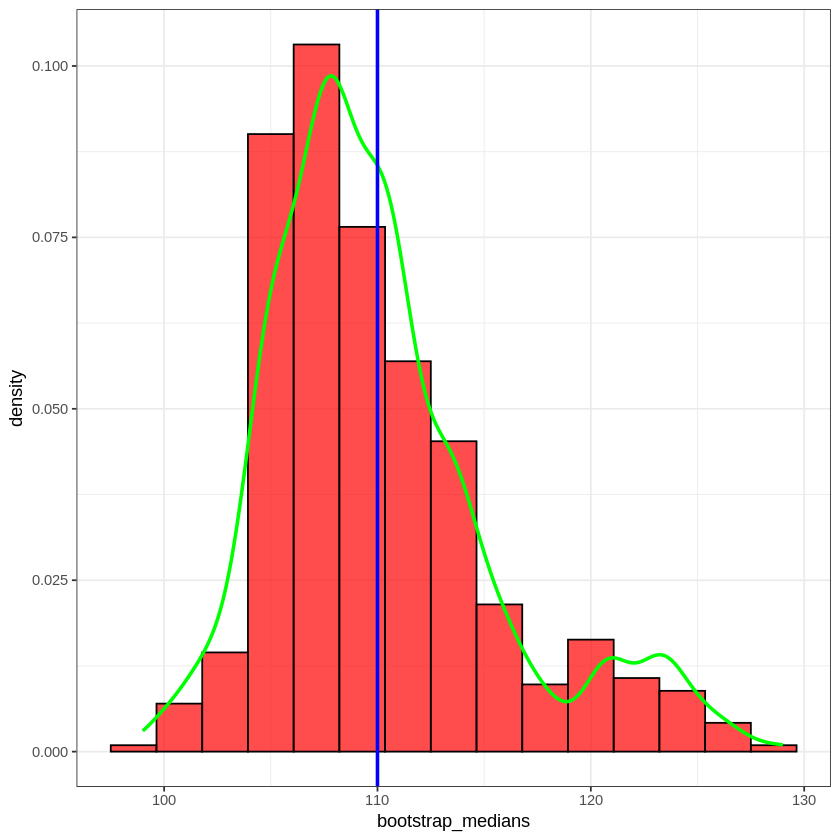

In [ ]:
set.seed(99)
library(ggplot2)
bootstrap_medians = replicate(1000, {
  sample_median = median(sample(cats$age_days, size = nrow(cats), replace = TRUE), na.rm = TRUE)
  sample_median
})
bootstrap_medians

bootstrap_medians_df = data.frame(bootstrap_medians = bootstrap_medians)

ggplot(bootstrap_medians_df)+
geom_histogram(aes(x=bootstrap_medians,y =  after_stat(density)), bins=15, alpha = 0.7,color="black",fill="red")+
geom_density(aes(x=bootstrap_medians), color="green", size =1)+
geom_vline(aes(xintercept = median_cat_ages), color = "blue", size = 1) +
theme_bw()

---
**PART 3.F**

Do you think this distribution is well approximated by a normal distribution? What deviations from normality can you detect, if any?

_Make sure your reasoning is consistent with your plot._

This distribution is not well approximated  by normal distribution.
- The deviation from normality that I can detect is that there is skewness in the right due to the presence of outliers so it contains a comparably heavier tails.



---

_We'll use **percentile bootstrap** to compute the 95\% confidence interval: we'll find the $2.5$th and $97.5$th percentiles of the bootstrap distribution, which will determine the lower and upper limits of the CI. This way, 95\% of the distribution will be within the confidence interval._

---

**PART 3.G**

Take a look at the density plot of bootstrapped medians that you created before. Do you think the percentile bootstrap CI will be symmetric around the median of the original sample? Which of the lower/upper limits do you think will be closer to the sample median, and why?

_Note: the answer completely depends on your specific bootstrap samples! It's can be different for different people, and even for different executions of the same code._

_Don't forget to justify your answer! You can use the density plot you generated before to eyeball where the percentiles will be, based on the "mass" of the distribution._

- I don't think the percentile bootstrap CI will be symmetric around the median of the original sample.
- The lower CI will be closer to the sample median because it is right skewed which leads to a greater spread of the data with higher values (outliers) present in the right tail so the Upper CI won't be closer to Median.

---
**PART 3.H**

Compute the lower and upper limits of the 95\% bootstrap confidence interval using the percentile method.
Additionally, compute the difference of both lower and upper limits of the CI with the sample median

In [ ]:
lower_CI = quantile(bootstrap_medians_df$bootstrap_medians,0.025)
upper_CI = quantile(bootstrap_medians_df$bootstrap_medians,0.975)

lower_CI
upper_CI

cat("Difference")
lower_limit_difference = median_cat_ages - lower_CI
upper_limit_difference = upper_CI - median_cat_ages

lower_limit_difference
upper_limit_difference

2.5% 
 102

97.5% 
  124

Difference

2.5% 
   8

97.5% 
   14

---
**PART 3.I**

**Please note that this problem part is OPTIONAL for STAT 4010 students and is REQUIRED for STAT 5010 students.**

If you want a better idea about the distribution of bootstrap statistics, you need more bootstrap samples. Now imagine if your dataset is huge  -- hundreds of millions of records, and to generate even one bootstrap sample, you'll need to sample those hundreds of millions of records with replacement.

If you want to generate a million bootstrap samples, you need to sample hundreds of millions of records a million times. You can see how this can get computationally prohibitive very quick!

There are many methods to make the bootstrap more computationally efficient. One of them was [developed at Spotify](https://engineering.atspotify.com/2022/03/comparing-quantiles-at-scale-in-online-a-b-testing/). The linked article  proposes a fast bootstrap algorithm for computing quantiles (like a median). It also gives Python code examples of applying that algorithm to simulated data.

**Your task in this question is to reimplement the algorithm in R, and apply it to the dataset you've been working with to compute the 95\% bootstrap confidence for the median of cat ages, using 500 000 bootstrap samples.**

Here are some pointers:

* You'll need the single-sample bootstrap example, which is the first code sample in the article.You'll need to figure out what each line of code does, and apply it to your case. (But please read the rest of the article too, to understand what's happening! The most exciting contribution of the article is actually the second example).

* Note that the code sample uses simulated data from a normal distribution! You'll need to change it to use the data from `cats$age_days` instead. In particular, the `sample_size` will be determined by the data.

* The code uses 1 000 000 bootstrap samples. You'll need to change that. (What other parts of the code will you need to change, if any?)

* You'll need to expore what the Python function `binom.ppf()` does. The function `qbinom()` in R accomplishes something similar, but make sure you read the documentation for both to see how they compare.

* Depending on your prior knowledge, you might also need to do some additional research to see how to do some array operations in R. This is part of the assignment!

* Python uses 0-based indexing, but R uses 1-based indexing of arrays! FYI Julia also uses 1-based indexing (there's a link to Julia code later in the article).


_Note 1: Most of you should be familiar with Python by now, and should be able to read the code in the linked article. If you are not familiar with Python, you can try one of the followifing options: (1) read through the algorithm description and just implement the code yourself, (2) click on the link in the article that leads to a repository containing Julia code and try to read the Julia code instead (Julia is often much more user-friendly for novices), or (3) ask a classmate or a Course Assistant for help._

_Note 2: Implementing new algorithms from papers that use a different programming language, and applying these new algorithms to your data, is something that you are very likely going to be doing in your professional day-to-day life very often. This specific problem is good practice for such workflow because the algorithm is very simple, and the code snipped provided by authors is short but complete. Many methods that you'll work with will have such simple setup, unfortunately._

- The bootstrapping which we usually do with resampling the data works well when it comes to computing a statistical measure which is mean and median but when it comes to predicting a statistical measure which related to Quantile it won't perform well and also it is computationally expensive to do it since it requires a large number of iterations when the sample size is really big.

- So a new algorithm called the bootstrapping without resampling is introduced.

- What this algorithm does is it uses the binomial distribution order statistics instead of again and again drawing the samples. The method of computing the ordered indices in which the quantiles are selected by using a Binomial(N+1,q) distribution.

- This algorithm is fast and also it reduces the computational complexity.

In [ ]:
alpha = 0.05
quantile_of_interest = 0.5
sample_size = length(cats$age_days)
num_bootstrap_samples = 500000

ordered_data = sort(cats$age_days)

CI_indices = qbinom(c(alpha/2, 1-alpha/2), sample_size+1, quantile_of_interest)

bootstrap_CI = ordered_data[c(CI_indices[1], CI_indices[2])]

ci_indexes
cat("The original median")
median_cat_ages
cat("95% Bootstrap Confidence Interval for the Median:", "(",
    round(bootstrap_CI[1], 2), ",", round(bootstrap_CI[2], 2), ")")



[1] 681 755

The original median

[1] 110

95% Bootstrap Confidence Interval for the Median: ( 102 , 124 )

---
### Problem 4 (30 Points): Hypothesis Testing with Randomization

For this problem, we will be performing a hypothesis test with randomization.

The Stanford University Heart Transplant Study was conducted to determine whether an experimental heart transplant program increased lifespan. Each patient entering the program was designated an official heart transplant candidate, meaning that they were gravely ill and would most likely benefit from a new heart. Some patients got a transplant and some did not. The variable `transplant` indicates which group the patients were in; patients in the treatment group got a transplant and those in the control group did not. Of the 34 patients in the control group, 30 died. Of the 69 people in the treatment group, 45 died. Another variable called `survived` was used to indicate whether or not the patient was alive at the end of the study.
![transplant_study.png](attachment:e1769df5-ad40-492f-8240-174f01bc51f6.png)

**Part 4.A**: Does the stacked bar plot indicate that survival is independent of whether or not the patient got a transplant? Explain your reasoning?

No, the survival is dependent of whether or not the patient got a transplant
because,
- The number of people who survived in Treatment group is (24/69 ~ 0.35) who all took the treatment but the no. of people who survived in the control group is just (4/34 ~ 0.11) who did not take any treatment.
- This indicated that the people who took the transplant have higher chances of survival compared to the people who did't do transplant so 'transplant' played a role in the patient's survival.
- But inorder to confirm whether it played a significant role in deciding the patient 'death/survived' need to do some statistical tests to confirm it.

**Part 4.B:** What do the box plots above suggest about the efficacy (effectiveness) of the heart transplant treatment?

- Patients in the treatment group lived longer days after taking a heart transplant and the patients in control group lived very few days (survival time) as per the box plot.
- The spread of data with a large IQR also an evidence for the people who did transplant lived more days compared to the people who did not.
- Also in the Treatment group there are people (outliers) who survived longer than usual which indicates that the heart transplant played a significant role in deciding the patient 'death/survive'

**Part 4.C:** What proportion of patients in the treatment group and what proportion of patients in the control group died?

- % of Patients died in control group:
$$\frac{30}{34} = 0.88 = 88\% $$
- % of Patients died in treatment group:
$$\frac{45}{69} = 0.65 = 65\% $$

**Part 4.D:** Now we will perform a hypothesis test using randomization. State the null and alternative hypotheses for the test.

- $H_{0}$ : Survival of patient is independent of whether or not receiving a heart transplant.
- $H{1}$ : Survival of patient is dependent of whether or not receiving a heart transplant.

---
**Part 4.E:** Run 1000 simulations for a randomization test and compile the results in a histogram. Display your histogram below. Please see pages 215-216 in "Introduction to Modern Statistics" as a reference for this. Note that this problem is taken directly from the textbook. We are trying to see if we can replicate the results. Due to random sampling, it is expected that your histograms should be slightly different from the textbook and from each other.

Note, you will need to create synthetic data. There were $34+69 = 103$ Total people in this study. You will need to create a process for labeling the data points as "survivor" or "non-survivor" and making random draws from this labeled data. Hint: You could make a list or a csv file with this data and then sample it randomly. Or you could compute the rate of survivors vs non-survivors within these 103 data values and simulate the data using the survival rate as a probability distribution. Or you could come up with your own process. The first way I described it a bit closer to the classic set up we have been discussing in class. But I think the second way is a reasonable approximation. Either is fine for the sake of this homework assignment.

,diff
,<dbl>
1,-0.20886616
2,-0.07715260
3,-0.07715260
4,-0.07715260
5,0.05456095
6,0.01065644


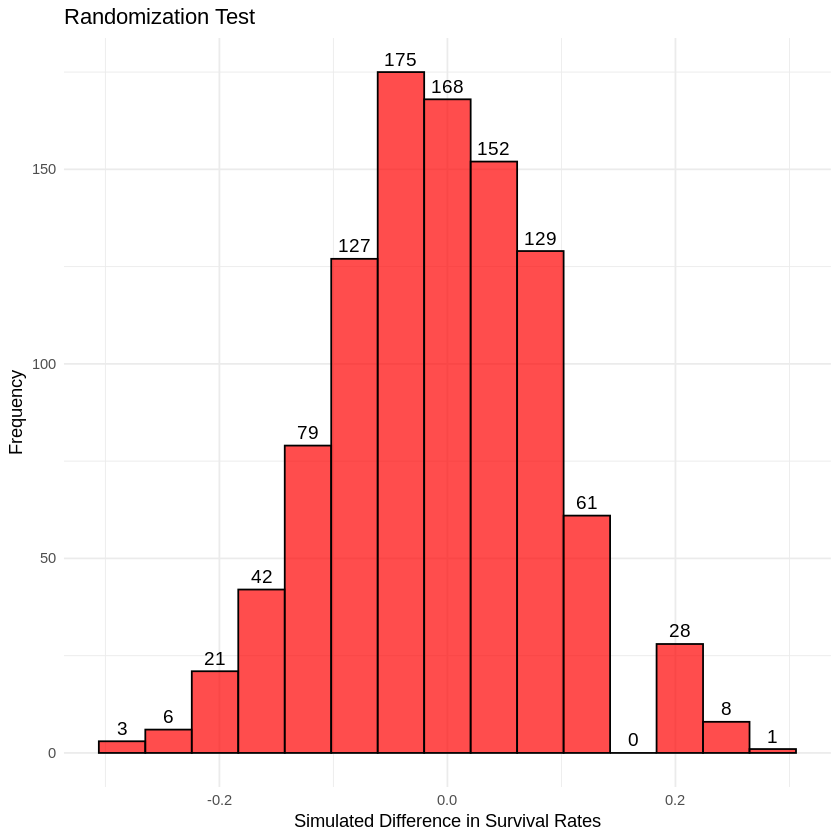

In [ ]:
set.seed(47)
patient_outcomes = c(rep(0, 28), rep(1, 75))
num_simulations = 1000

simulated_differences = numeric(num_simulations)


for (i in seq_len(num_simulations)) {

  control_indices = sample(seq_along(patient_outcomes), size = 34, replace = FALSE)
  control_group = patient_outcomes[control_indices]

  remaining_patients = patient_outcomes[-control_indices]
  treatment_indices = sample(seq_along(remaining_patients), size = 69, replace = FALSE)
  treatment_group = remaining_patients[treatment_indices]

  control_survival_rate = sum(control_group) / 34
  treatment_survival_rate = sum(treatment_group) / 69
  simulated_differences[i] = control_survival_rate - treatment_survival_rate
}


simulated_df = data.frame(diff = simulated_differences)
head(simulated_diff_df)

library(ggplot2)

ggplot(simulated_df, aes(x = diff)) +
  geom_histogram(bins = 15, fill = "red", color = "black", alpha = 0.7) +
  geom_text(stat = "bin", bins = 15, aes(label = after_stat(count), y = after_stat(count)),
            vjust = -0.5, color = "black", size = 4) +
  labs(title = "Randomization Test",
       x = "Simulated Difference in Survival Rates",
       y = "Frequency") +
  theme_minimal()


**Part F:** What is your conclusion and why? (In other words, will you reject your null hypothesis or fail to reject your null hypothesis?)

In [ ]:
simulated_differences <- simulated_df$diff
observed_difference = 0.23
p_value = mean(abs(simulated_differences) >= abs(observed_difference))
print(paste("P-value:", round(p_value, 4)))

[1] "P-value: 0.018"


- THe p-value is 0.018 which clearly shows that approximately just 18/1000 points are above 0.23 observed difference. So we reject $H_{0}$
- Survival of patient is dependent of whether or not receiving a heart transplant and it is not due to randomness.
- Heart transplant plays a significant role in the survival of a patient.